In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from skimage.io import imread
import pylab
from skimage.util import img_as_float

In [6]:
image = imread("parrots.jpg")


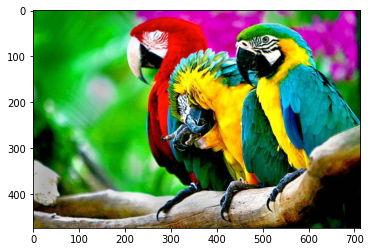

In [7]:
pylab.imshow(image)


In [34]:
X = img_as_float(image=image)

In [35]:
original_shape = X.shape

In [36]:
original_shape

(474, 713, 3)

In [37]:
X = X.reshape((-1,3))

In [38]:
X.shape

(337962, 3)

In [48]:
df = pd.DataFrame()
df["R"], df["G"], df["B"] = X[:, 0], X[:, 1], X[:, 2]


In [49]:
df.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.011765,0.490196,0.015686
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


In [50]:
kmeans = KMeans(init="k-means++", random_state=241)


In [51]:
df["labels"] = kmeans.fit_predict(X)

In [43]:
def fill(row, method):
    if method == "median":
        r =
        g
        b 

SyntaxError: invalid syntax (Temp/ipykernel_7052/2735414315.py, line 3)

In [58]:
mean_cluster_colors = df.groupby("labels").mean()
median_cluster_colors = df.groupby("labels").median()


In [68]:
for i in range(8):
    df_mean, df_median = df.copy(), df.copy()
    df.loc[df.labels == i, "R"] = mean_cluster_colors.iloc[i]["R"]
    df.loc[df.labels == i, "G"] = mean_cluster_colors.iloc[i]["G"]
    df.loc[df.labels == i, "B"] = mean_cluster_colors.iloc[i]["B"]


In [69]:
X_mean = df_mean[["R", "G", "B"]].values
X_median = df_median[["R", "G", "B"]].values


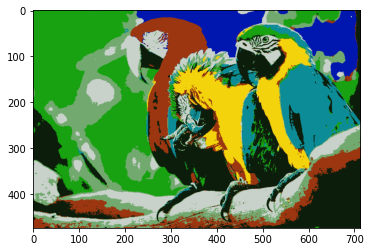

In [70]:
pylab.imshow(X_mean.reshape(original_shape))


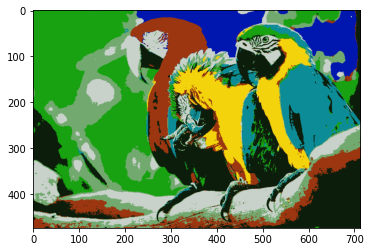

In [71]:
pylab.imshow(X_median.reshape(original_shape))
